In [1]:
import sys
sys.path.insert(0, 'C:/Users/user/Documents/iplab/stock_factor_lab')

In [2]:
from database import Database
from get_data import Data
import backtest
from combinations import sim_conditions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
# 中文字體
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Microsoft JhengHei']

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib.ticker import FuncFormatter

In [4]:
def data_to_dict(file_path):
    # 使用 pandas 讀取 Excel 文件
    df = pd.read_excel(file_path)

    # 找到股票代號和公司名稱欄位
    stock_code_col = '股票代號'
    company_name_col = '公司名稱'

    # 將股票代號轉為整數並創建字典
    data_dict = df.set_index(stock_code_col)[company_name_col].to_dict()
    stock_code_list = list(map(str, data_dict.keys()))
    return data_dict

In [5]:
def dict_to_list(data_dict):
    stock_code_list = list(map(str, data_dict.keys()))  # 將每個值轉換為字串
    return stock_code_list

# 5 A 股 還沒

In [6]:
# %pip install openpyxl

In [7]:
file_path_5A = 'C:/Users/user/Documents/iplab/stock_factor_lab/code_lahouse/Lahouse_Matrix_ROE_FCF_Score_5A_Company.xlsx'

data_dict = data_to_dict(file_path_5A)

print("5A")
# 增加可讀性地打印字典
for stock_code, company_name in data_dict.items():

    print(f"股票代號: {stock_code}, 公司名稱: {company_name}")

# 打印總筆數

print(f"總共 {len(data_dict)} 筆資料")

5A
股票代號: 5278, 公司名稱: 尚凡
股票代號: 8435, 公司名稱: 鉅邁
股票代號: 3611, 公司名稱: 鼎翰
股票代號: 5287, 公司名稱: 數字
股票代號: 2385, 公司名稱: 群光
股票代號: 4205, 公司名稱: 中華食
股票代號: 6123, 公司名稱: 上奇
股票代號: 6292, 公司名稱: 迅德
股票代號: 2308, 公司名稱: 台達電
股票代號: 1264, 公司名稱: 德麥
股票代號: 3529, 公司名稱: 力旺
股票代號: 9917, 公司名稱: 中保科
股票代號: 1341, 公司名稱: 富林-KY
股票代號: 2377, 公司名稱: 微星
股票代號: 5903, 公司名稱: 全家
股票代號: 8416, 公司名稱: 實威
股票代號: 6263, 公司名稱: 普萊德
股票代號: 8446, 公司名稱: 華研
股票代號: 8464, 公司名稱: 億豐
股票代號: 910322, 公司名稱: 康師傅-DR
股票代號: 4506, 公司名稱: 崇友
股票代號: 1476, 公司名稱: 儒鴻
股票代號: 6146, 公司名稱: 耕興
股票代號: 3570, 公司名稱: 大塚
股票代號: 3226, 公司名稱: 至寶電
股票代號: 2546, 公司名稱: 根基
股票代號: 6281, 公司名稱: 全國電
股票代號: 2548, 公司名稱: 華固
股票代號: 6412, 公司名稱: 群電
股票代號: 9911, 公司名稱: 櫻花
股票代號: 5609, 公司名稱: 中菲行
股票代號: 2395, 公司名稱: 研華
股票代號: 6294, 公司名稱: 智基
股票代號: 1707, 公司名稱: 葡萄王
股票代號: 5289, 公司名稱: 宜鼎
股票代號: 6637, 公司名稱: 醫影
股票代號: 2345, 公司名稱: 智邦
股票代號: 6803, 公司名稱: 崑鼎
股票代號: 6561, 公司名稱: 是方
股票代號: 2707, 公司名稱: 晶華
股票代號: 2404, 公司名稱: 漢唐
股票代號: 6409, 公司名稱: 旭隼
股票代號: 8083, 公司名稱: 瑞穎
股票代號: 5212, 公司名稱: 凌網
股票代號: 8454, 公司名稱: 富邦媒
股票代號: 3045, 公司名稱: 台灣大
股票代號: 4728, 

In [8]:
stock_code_list = dict_to_list(data_dict)
print("股票代號列表:", stock_code_list)

股票代號列表: ['5278', '8435', '3611', '5287', '2385', '4205', '6123', '6292', '2308', '1264', '3529', '9917', '1341', '2377', '5903', '8416', '6263', '8446', '8464', '910322', '4506', '1476', '6146', '3570', '3226', '2546', '6281', '2548', '6412', '9911', '5609', '2395', '6294', '1707', '5289', '6637', '2345', '6803', '6561', '2707', '2404', '6409', '8083', '5212', '8454', '3045', '4728', '3034', '2379', '3130', '2912', '1232', '5274', '5434', '9910', '3293', '2480', '5904', '2458']


In [9]:
codes_to_remove = ['6846', '2948', '2949', '6881', '6835', '6894']
stock_code_list = [code for code in stock_code_list if code not in codes_to_remove]

print("股票代號列表:", stock_code_list)

股票代號列表: ['5278', '8435', '3611', '5287', '2385', '4205', '6123', '6292', '2308', '1264', '3529', '9917', '1341', '2377', '5903', '8416', '6263', '8446', '8464', '910322', '4506', '1476', '6146', '3570', '3226', '2546', '6281', '2548', '6412', '9911', '5609', '2395', '6294', '1707', '5289', '6637', '2345', '6803', '6561', '2707', '2404', '6409', '8083', '5212', '8454', '3045', '4728', '3034', '2379', '3130', '2912', '1232', '5274', '5434', '9910', '3293', '2480', '5904', '2458']


# 4 A 股 1 B 或 1 C 股 還沒


In [10]:
file_path_5A = 'C:/Users/user/Documents/iplab/stock_factor_lab/code_lahouse/Lahouse_Matrix_ROE_FCF_Score_4A_1B_or_1C_Company.xlsx'

data_dict = data_to_dict(file_path_5A)

print("4A1B_or_1C")
# 增加可讀性地打印字典
for stock_code, company_name in data_dict.items():

    print(f"股票代號: {stock_code}, 公司名稱: {company_name}")

# 打印總筆數

print(f"總共 {len(data_dict)} 筆資料")

4A1B_or_1C
股票代號: 8342, 公司名稱: 益張
股票代號: 3030, 公司名稱: 德律
股票代號: 6669, 公司名稱: 緯穎
股票代號: 1216, 公司名稱: 統一
股票代號: 6613, 公司名稱: 朋億*
股票代號: 6629, 公司名稱: 泰金-KY
股票代號: 4966, 公司名稱: 譜瑞-KY
股票代號: 6664, 公司名稱: 群翊
股票代號: 8284, 公司名稱: 三竹
股票代號: 5403, 公司名稱: 中菲
股票代號: 2948, 公司名稱: 寶陞
股票代號: 2753, 公司名稱: 八方雲集
股票代號: 2455, 公司名稱: 全新
股票代號: 1615, 公司名稱: 大山
股票代號: 2428, 公司名稱: 興勤
股票代號: 6683, 公司名稱: 雍智科技
股票代號: 6231, 公司名稱: 系微
股票代號: 1580, 公司名稱: 新麥
股票代號: 3029, 公司名稱: 零壹
股票代號: 3023, 公司名稱: 信邦
股票代號: 3147, 公司名稱: 大綜
股票代號: 5474, 公司名稱: 聰泰
股票代號: 6728, 公司名稱: 上洋
股票代號: 6176, 公司名稱: 瑞儀
股票代號: 1590, 公司名稱: 亞德客-KY
股票代號: 3206, 公司名稱: 志豐
股票代號: 6881, 公司名稱: 潤德
股票代號: 2643, 公司名稱: 捷迅
股票代號: 2382, 公司名稱: 廣達
股票代號: 1477, 公司名稱: 聚陽
股票代號: 2640, 公司名稱: 大車隊
股票代號: 5283, 公司名稱: 禾聯碩
股票代號: 3218, 公司名稱: 大學光
股票代號: 5234, 公司名稱: 達興材料
股票代號: 6577, 公司名稱: 勁豐
股票代號: 6523, 公司名稱: 達爾膚
股票代號: 3537, 公司名稱: 堡達
股票代號: 4974, 公司名稱: 亞泰
股票代號: 8070, 公司名稱: 長華*
股票代號: 2330, 公司名稱: 台積電
股票代號: 6732, 公司名稱: 昇佳電子
股票代號: 2360, 公司名稱: 致茂
股票代號: 8016, 公司名稱: 矽創
股票代號: 6472, 公司名稱: 保瑞
股票代號: 6525, 公司名稱: 捷敏-KY
股票代號: 3213, 公司名稱

In [11]:
stock_code_list_4A = dict_to_list(data_dict)
print("股票代號列表:", stock_code_list_4A)

股票代號列表: ['8342', '3030', '6669', '1216', '6613', '6629', '4966', '6664', '8284', '5403', '2948', '2753', '2455', '1615', '2428', '6683', '6231', '1580', '3029', '3023', '3147', '5474', '6728', '6176', '1590', '3206', '6881', '2643', '2382', '1477', '2640', '5283', '3218', '5234', '6577', '6523', '3537', '4974', '8070', '2330', '6732', '2360', '8016', '6472', '6525', '3213', '8081', '6651', '6121', '1537', '4549', '6856', '8049', '8109', '6643', '2467', '3044', '3014', '3557', '2755', '4137', '5299', '6691', '7584', '3217', '2114', '6703', '2752', '6203', '2383', '6781', '6138', '6670', '3558', '6470', '5871', '4953', '5269', '3443', '6811', '2373', '5288', '3546', '6183']


In [12]:
codes_to_remove = ['7584', '6811', '3168', '5292', '3430']
stock_code_list_4A = [code for code in stock_code_list if code not in codes_to_remove]

print("股票代號列表:", stock_code_list_4A)

股票代號列表: ['5278', '8435', '3611', '5287', '2385', '4205', '6123', '6292', '2308', '1264', '3529', '9917', '1341', '2377', '5903', '8416', '6263', '8446', '8464', '910322', '4506', '1476', '6146', '3570', '3226', '2546', '6281', '2548', '6412', '9911', '5609', '2395', '6294', '1707', '5289', '6637', '2345', '6803', '6561', '2707', '2404', '6409', '8083', '5212', '8454', '3045', '4728', '3034', '2379', '3130', '2912', '1232', '5274', '5434', '9910', '3293', '2480', '5904', '2458']


In [13]:
data=Data()

# 買進策略-1

In [14]:
# roe = data.get("report:roe")

In [15]:
# roe_value_cond = {}

# for i in range(10, 26, 5): # 大於 10~25%
#     for n in range(12, 6): # 3, 4, 5年平均
        
#         roe_rolling = roe.rolling(n).mean()['2017-01-01':]
#         roe_cond = roe_rolling > i
#         roe_value_cond[f'roe_{n}y_{i}'] = roe_cond
        
# roe_value_collc = sim_conditions(roe_value_cond, resample='Q', data=data)
# roe_value_collc.plot_creturns()
# roe_value_collc.plot_stats(mode='heatmap')

In [16]:
# # 畫圖的

# roe_15_plot = (roe > 15).sum(axis=1)  # 計算每年 ROE > 15% 的公司數量

# # 假設 roe_15_plot 的 index 是日期，轉換為年份
# roe_15_plot.index = roe_15_plot.index.year  # 將 index 轉換為年份

# # 繪圖並進行客製化
# plt.figure(figsize=(10, 6))
# ax = roe_15_plot.plot(marker='o', linewidth=1, grid=True)  # 加入 grid
# ax.set_title('每年 ROE > 15% 的公司')  # 設定標題
# ax.set_xlabel('Year')  # 設定 X 軸標籤
# ax.set_ylabel('Count')  # 設定 Y 軸標籤

# # 設置 X 軸標籤為所有年份
# ax.set_xticks(roe_15_plot.index)  # 設定 x 軸刻度為年份
# ax.set_xticklabels(roe_15_plot.index, rotation=90)  # 設置標籤角度，以防止重疊

# plt.tight_layout()

# # 顯示圖表
# plt.show()

# 買進策略-2

In [17]:
roe = data.get('report_fundamentals:roe(a)－稅後')[stock_code_list_4A].loc['2019-03-31':'2023-12-31']

In [18]:
roe_rank = roe.rank(axis=1, pct=True)
stocks1 = roe_rank > 0.2 # 寬鬆，選擇前 80% 的股票
stocks2 = roe_rank > 0.4
stocks3 = roe_rank > 0.6
stocks4 = roe_rank > 0.8 # 嚴苛，選擇前 20% 的股票

In [19]:
comb = {
    'stocks1': roe_rank > 0.2,
    'stocks2': roe_rank > 0.4,
    'stocks3': roe_rank > 0.6,
    'stocks4': roe_rank > 0.8
}

roe_rank_collc = sim_conditions(comb, resample='Q', data=data)
roe_rank_collc.plot_creturns()

Backtesting progress: 100%|██████████| 4/4 [00:01<00:00,  3.47condition/s]


In [20]:
roe_rank_collc.plot_stats(mode='heatmap')

,CAGR,daily_sharpe,max_drawdown,avg_drawdown,win_ratio,ytd
stocks4,0.263564,43.960000,-0.282300,-0.045563,0.705882,0.216671
stocks3,0.228099,51.120000,-0.229369,-0.034365,0.565217,0.125364
stocks2,0.212719,56.980000,-0.220897,-0.026304,0.500000,0.123701
stocks1,0.201331,57.830000,-0.215063,-0.021887,0.611111,0.085204


In [21]:
roe_rank_collc.reports['stocks1'].display()

,annualized_rate_of_return,sharpe,max_drawdown,win_ratio
,20.13%,57.83,-21.51%,61.11%


,entry_date,exit_date,entry_sig_date,exit_sig_date,position,period,entry_index,exit_index,return,mae,gmfe,bmfe,mdd,pdays,weight,next_weights
stock_id,,,,,,,,,,,,,,,,
4205,2019-07-01,2023-04-06,2019-06-28,2023-03-31,0.020833,916,4842,5758,0.736841,-0.030624,1.290494,0.274037,-0.300175,911.0,0.000000,0.000000
6292,2022-04-01,2023-04-06,2022-03-31,2023-03-31,0.020833,244,5514,5758,0.008173,-0.191074,0.049541,0.042283,-0.223890,54.0,0.000000,0.000000
8446,2019-07-01,2023-04-06,2019-06-28,2023-03-31,0.020833,916,4842,5758,-0.087588,-0.312296,0.125992,0.125992,-0.389247,172.0,0.000000,0.000000
5278,2019-07-01,NaT,2019-06-28,NaT,0.020833,1239,4842,-1,1.305117,-0.576974,1.628064,0.071424,-0.605174,718.0,0.020833,0.020833
3611,2019-07-01,NaT,2019-06-28,NaT,0.020833,1239,4842,-1,0.126467,-0.377414,0.457045,0.071665,-0.419047,468.0,0.020833,0.020833
5287,2019-07-01,NaT,2019-06-28,NaT,0.020833,1239,4842,-1,0.236398,-0.336949,0.302306,0.011626,-0.344569,664.0,0.020833,0.020833
2385,2020-04-01,NaT,2020-03-31,NaT,0.020833,1056,5025,-1,1.696951,0.000000,3.312437,0.000000,-0.377285,1055.0,0.020833,0.020833
6123,2019-07-01,NaT,2019-06-28,NaT,0.020833,1239,4842,-1,1.260049,-0.203286,1.706582,0.077174,-0.260366,1098.0,0.020833,0.020833
1264,2019-07-01,NaT,2019-06-28,NaT,0.020833,1239,4842,-1,1.032899,-0.130357,1.038749,0.073986,-0.211647,1203.0,0.020833,0.020833


In [22]:
# 顯示篩選結果
stocks2

company_symbol,5278,8435,3611,5287,2385,4205,6123,6292,2308,1264,...,3130,2912,1232,5274,5434,9910,3293,2480,5904,2458
2019-03-31,True,False,True,True,False,False,False,False,False,True,...,False,True,True,True,False,True,True,False,True,True
2020-03-31,True,False,True,True,True,False,False,False,False,False,...,False,True,True,True,False,True,True,False,True,True
2021-03-31,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,False,True,True,False,True,True
2022-03-31,True,False,False,True,False,False,True,True,False,False,...,True,True,True,True,False,True,True,False,True,True
2023-03-31,True,False,False,True,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [23]:
# 呼叫回測API
report = backtest.sim(stocks4, resample="Q", data=data)

In [24]:
report.display()

,annualized_rate_of_return,sharpe,max_drawdown,win_ratio
,26.36%,43.96,-28.23%,70.59%


,entry_date,exit_date,entry_sig_date,exit_sig_date,position,period,entry_index,exit_index,return,mae,gmfe,bmfe,mdd,pdays,weight,next_weights
stock_id,,,,,,,,,,,,,,,,
2377,2022-04-01,2023-04-06,2022-03-31,2023-03-31,0.083333,244,5514,5758,0.209637,-2.307682e-01,0.215487,0.046154,-0.264705,108.0,0.000000,0.000000
6294,2019-07-01,2023-04-06,2019-06-28,2023-03-31,0.083333,916,4842,5758,0.494387,-2.031897e-01,0.771374,0.004505,-0.318925,711.0,0.000000,0.000000
2707,2022-04-01,2023-04-06,2022-03-31,2023-03-31,0.083333,244,5514,5758,0.682130,-8.595985e-02,0.965709,0.020056,-0.180535,204.0,0.000000,0.000000
8454,2022-04-01,2023-04-06,2022-03-31,2023-03-31,0.083333,244,5514,5758,0.110831,-4.286452e-01,0.201278,0.106269,-0.483530,66.0,0.000000,0.000000
2458,2020-04-01,2023-04-06,2020-03-31,2023-03-31,0.083333,733,5025,5758,0.486984,0.000000e+00,1.784235,0.000000,-0.596581,733.0,0.000000,0.000000
5278,2019-07-01,NaT,2019-06-28,NaT,0.083333,1239,4842,-1,1.305117,-5.769739e-01,1.628064,0.071424,-0.605174,718.0,0.083333,0.083333
3529,2021-04-01,NaT,2021-03-31,NaT,0.083333,812,5269,-1,1.706649,-1.124999e-01,2.792579,0.027273,-0.632330,794.0,0.083333,0.083333
5609,2021-04-01,NaT,2021-03-31,NaT,0.083333,812,5269,-1,0.731116,-1.701874e-01,0.933909,0.031055,-0.525883,756.0,0.083333,0.083333
2345,2023-04-06,NaT,2023-03-31,NaT,0.083333,323,5758,-1,0.659749,-1.090031e-01,0.861617,0.009478,-0.324253,289.0,0.083333,0.083333


In [25]:
report.get_stats()

{'CAGR': 0.26356393098484165,
 'daily_sharpe': 43.96,
 'max_drawdown': -0.28230012812766414,
 'avg_drawdown': -0.04556283398813895,
 'win_ratio': 0.7058823529411765,
 'ytd': 0.2166705254017376}

In [26]:
import pandas as pd
import plotly.graph_objects as go


trades_df = report.trades
trades_df["cum_return"] =  (1 + trades_df['return']).groupby(trades_df['stock_id']).cumprod() - 1
trades_df = trades_df.groupby('stock_id').last()
trades_df = trades_df.reset_index()

# 假設您有一個 DataFrame，命名為 df，其中包含每次交易的股票、收益等信息

# 設定 entry_date 的型態為 datetime
trades_df['entry_date'] = pd.to_datetime(trades_df['entry_date'])

# 提取年份資訊
trades_df['year'] = trades_df['entry_date'].dt.year
topN = 5
grouped = trades_df.groupby(['year', 'stock_id'])['cum_return'].last().reset_index()


# 假设 trades_df 已经包含 'year', 'stock_id', 和 'cum_return'
# 先按照股票和年份分组计算每年每只股票的累积回报
topN = 5
grouped = trades_df.groupby(['year', 'stock_id'])['cum_return'].last().reset_index()

# 对每年的数据进行处理，选择前N只和其他股票的总和
def process_year_group(group):
    top_stocks = group.nlargest(topN, 'cum_return')
    # 计算其他股票的总和
    other_total = group[~group['stock_id'].isin(top_stocks['stock_id'])]['cum_return'].sum()
    # 将其他股票的总和作为一行添加进来
    other_row = pd.DataFrame({'year': [group['year'].iloc[0]],
                              'stock_id': ['其他'],
                              'cum_return': [other_total]})
    return pd.concat([top_stocks, other_row], ignore_index=True)

# 应用上述函数
final_data = grouped.groupby('year').apply(process_year_group).reset_index(drop=True)
fig = go.Figure()

# 首先添加“其他”类别的条形图追踪
other_data = final_data[final_data['stock_id'] == '其他']
if not other_data.empty:
    fig.add_trace(go.Bar(
        x=other_data['year'],
        y=other_data['cum_return'],
        name='其他',
        marker=dict(
            color='white',  # 设置填充颜色为白色
            pattern_shape="/"  # 设置填充图案为斜线
        )
    ))

# 然后添加其他股票的追踪
for stock_id in final_data['stock_id'].unique():
    if stock_id != '其他':
        stock_data = final_data[final_data['stock_id'] == stock_id]
        fig.add_trace(go.Bar(
            x=stock_data['year'],
            y=stock_data['cum_return'],
            name=f'Stock {stock_id}'
        ))

fig.update_layout(
    barmode='stack',
    title='年度前五高報酬所佔全部比例',
    xaxis=dict(title='年份'),
    yaxis=dict(title='累積回報'),
    legend_title="公司代號"
)

fig.show()

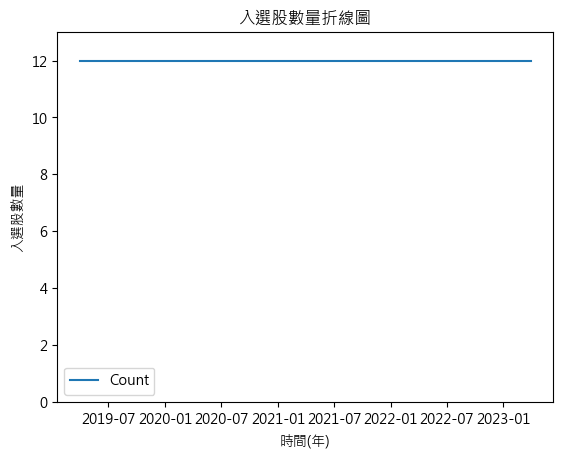

In [27]:
# 顯示每一天的入選數量
true_counts = stocks4.sum(axis=1)
# 使用 matplotlib 繪製折線圖
plt.plot(true_counts.index, true_counts.values, label='Count')

# 添加標籤和標題
plt.xlabel('時間(年)')
plt.ylabel('入選股數量')
plt.title('入選股數量折線圖')

# 添加圖例
plt.legend()
# 調整 Y 軸的尺度（範圍）
plt.ylim(bottom=0, top=max(true_counts) + 1)  # 替換成您希望的範圍
# 顯示圖形
plt.show()

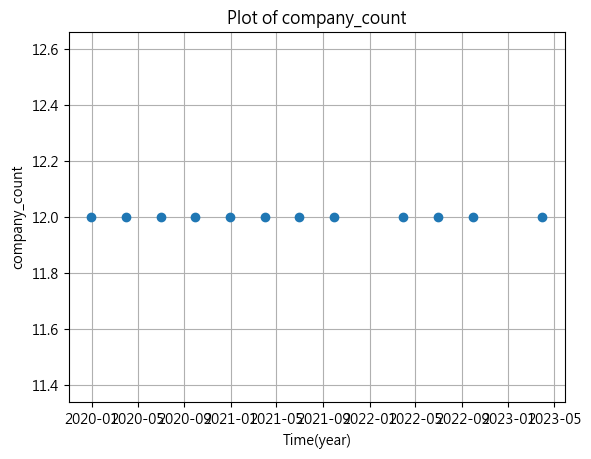

In [28]:
report.display_annual_plot(index='company_count')

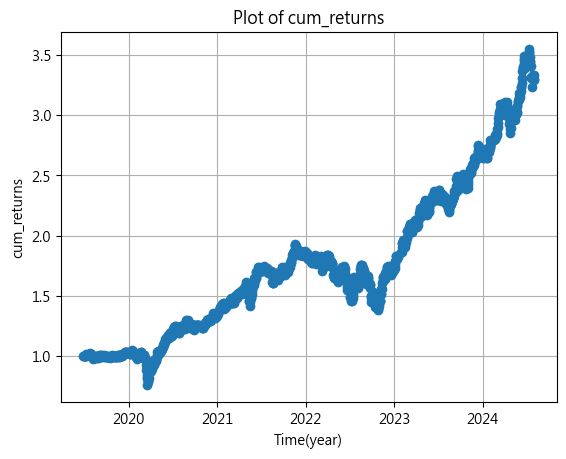

In [29]:
report.display_annual_plot(index='cum_returns')

In [30]:
report.display_reutrn_treemap()